# **Problem Statment**

Build a recommender system by using cosine simillarties score.


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# **Importing Dataset**

In [ ]:
df=pd.read_csv("book.csv",encoding_errors='ignore')

In [ ]:
df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [ ]:
df.shape

(10000, 4)

In [ ]:
df = df[["User.ID","Book.Title","Book.Rating"]]
df.sample(5)

,User.ID,Book.Title,Book.Rating
6136,2977,The Quest (Sonnet Books),6
1127,277711,"HOW TO WIN FRIENDS, REVISED",10
9293,161757,The Mermaids Singing (A Dr. Tony Hill &amp; Ca...,9
4956,2110,Mysticism: The Experience of the Divine : Medi...,8
5679,2545,The Black Moth,4


# **Performing EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User.ID      10000 non-null  int64 
 1   Book.Title   10000 non-null  object
 2   Book.Rating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [ ]:
df.isnull().sum()

User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

**As we can see above there are no null values in dataset.**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User.ID,10000.0,95321.2498,117645.703609,8.0,2103.0,3757.0,162052.0,278854.0
Book.Rating,10000.0,7.5663,1.821520,1.0,7.0,8.0,9.0,10.0


In [ ]:
df.duplicated().sum()

2

**As we can see Above there are two duplicate values in our dataset so let's drop that values**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.rename({'User.ID':'UserID','Book.Title':'BookTitle','Book.Rating':'BookRating'},axis = 1,inplace = True)

array([[<Axes: title={'center': 'UserID'}>,
        <Axes: title={'center': 'BookRating'}>]], dtype=object)

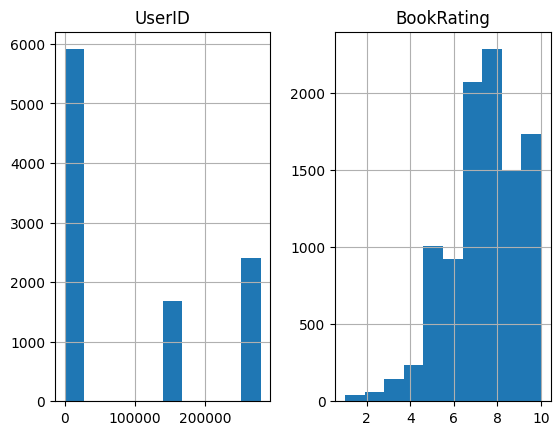

In [ ]:
df.hist()

In [ ]:
df.nunique()

UserID        2182
BookTitle     9659
BookRating      10
dtype: int64

**So as we can see above we have 2182 UserID, 9659 BookTitle and 10 BookRating unique data in our dataset.**

**let's sort with the userid**

In [ ]:
df =df.sort_values(by=['UserID'])

In [ ]:
df.head()

,UserID,BookTitle,BookRating
2401,8,Wings,5
2400,8,The Western way: A practical guide to the West...,5
2399,8,Ancient Celtic Romances,5
2402,8,Truckers,5
2405,8,The Art Of Celtia,7


In [ ]:
df.loc[df["BookRating"] == 'small', 'BookRating'] = 0
df.loc[df["BookRating"] == 'large', 'BookRating'] = 1

In [ ]:
df.BookTitle.value_counts()

Fahrenheit 451                                    5
The Subtle Knife (His Dark Materials, Book 2)     4
Stardust                                          4
Charlie and the Chocolate Factory                 4
Ender's Game (Ender Wiggins Saga (Paperback))     4
                                                 ..
The Littles to the Rescue (Littles)               1
When I Grow Up (Little Look-Look)                 1
The Crying Child                                  1
SABLE MOON                                        1
A Treasury of Irish Myth, Legend, and Folklore    1
Name: BookTitle, Length: 9659, dtype: int64

**So as we can see above the count of the booktitle is for Fahrenheit 451 Book.**

In [ ]:
df.BookRating.value_counts()

8     2283
7     2074
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

**The more number of rating are given to the book whose having userid 8. So let's see that visually**

<ipython-input-30-e0715ee9adb5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.BookRating)


<Axes: xlabel='BookRating', ylabel='Density'>

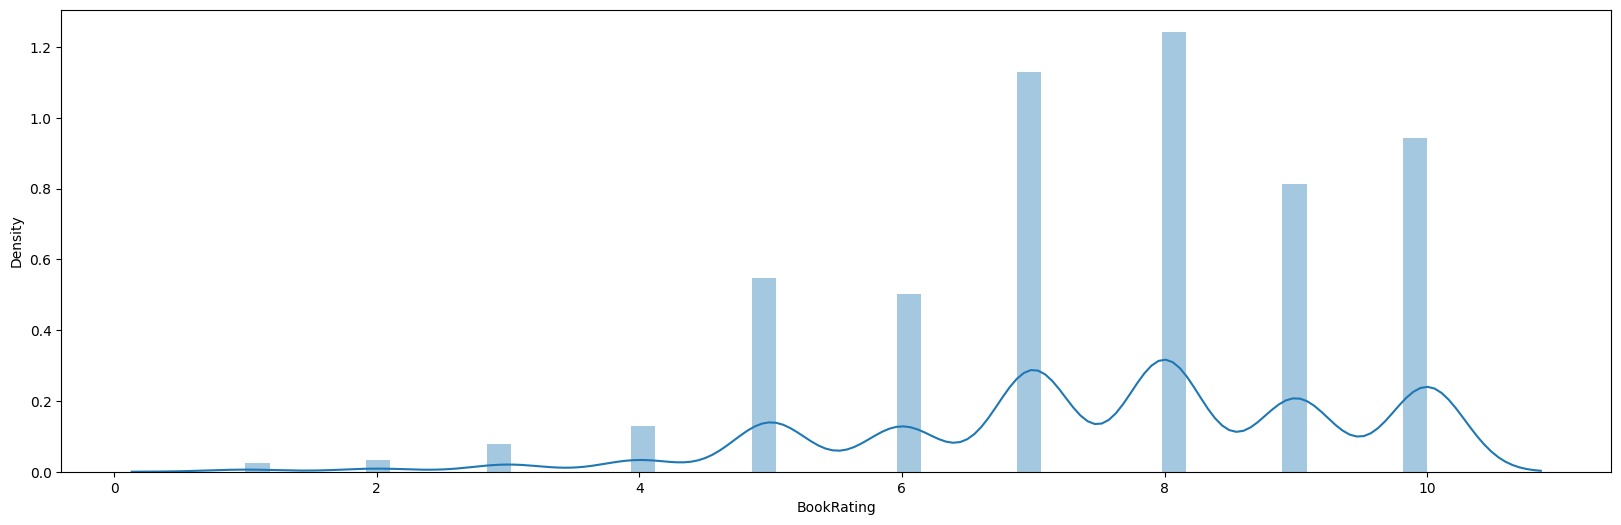

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(df.BookRating)

In [ ]:
book_df = df.pivot_table(index='UserID',
                   columns='BookTitle',
                   values='BookRating').reset_index(drop=True)

In [ ]:
book_df.fillna(0,inplace=True)

In [ ]:
book_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
AVG = df['BookRating'].mean()
print(AVG)

7.566413282656531


**So as we can see above the average bookrating for the books in our dataset is 7.56**

In [ ]:
minimum = df['BookRating'].quantile(0.90)
print(minimum)

10.0


**So as we can see above the minimum bookrating for the book in our dataset is 10**

In [ ]:
q_Books = df.copy().loc[df['BookRating'] >= minimum]
q_Books.shape

(1732, 3)

# **Model for Recommendation of books**

**so first let's try to get the similarity using Cosine metric.**

In [ ]:
user_sim=1-pairwise_distances(book_df.values,metric='cosine')

In [ ]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
user_sim_df=pd.DataFrame(user_sim)

In [ ]:
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
user_sim_df.index = df.UserID.unique()
user_sim_df.columns = df.UserID.unique()

In [ ]:
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
np.fill_diagonal(user_sim,0)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print([user_sim_df.idxmax(axis=1)1348])
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))

2576
3951      1.000000
1559      1.000000
162063    1.000000
278206    1.000000
2070      1.000000
2355      1.000000
277284    1.000000
278161    1.000000
276934    1.000000
278131    1.000000
278110    1.000000
162004    1.000000
705       1.000000
698       1.000000
160926    1.000000
933       1.000000
1326      1.000000
2576      1.000000
276850    1.000000
3952      1.000000
161645    1.000000
1348      0.752577
276780    0.707107
86        0.707107
278675    0.668965
276800    0.668965
277244    0.662266
278244    0.662266
278197    0.613941
278013    0.613941
3601      0.549972
277619    0.549972
277585    0.515325
277622    0.515325
276814    0.502571
277240    0.502571
278648    0.500000
277938    0.498464
2077      0.498464
508       0.495904
3874      0.495904
278012    0.476290
276744    0.476290
2520      0.463241
4225      0.463241
4049      0.453638
4207      0.453638
1192      0.437426
277660    0.437426
161880    0.384900
dtype: float64


In [ ]:
reader = df[(df['UserID']==1348) | (df['UserID']==2576)]
reader

,UserID,BookTitle,BookRating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8
5699,2576,Stardust,10


**So by seeing the above dataframe it shows that the userid 1348 and 2576 have similarity for the book stardust.**

In [ ]:
reader1=df[(df['UserID']==1348)]
reader1

,UserID,BookTitle,BookRating
3915,1348,Fantastic Beasts and Where to Find Them,7
3916,1348,Stardust,8


In [ ]:
reader2=df[(df['UserID']==2576)]
reader2

,UserID,BookTitle,BookRating
5699,2576,Stardust,10


# **Conclusion:**

-**so as we can see above the user whose userid is 1348 have read the books Fantastic beasts and where to find and stardust and gave rating as 7 & 8 respectively.**

-**also the user whose user id is 2576 have read the book stardust and gave rating as 10.**

-**As they both have the similar choice for the stardust book.**

-**so we can recommend Fantastic beasts and where to find book to the userid 2576 by using user to user similarity as they have the same choice for the book stardust.**

In [ ]:
s